# Load and Process GraphML files into GNN datasets


## Imports

In [1]:
from pathlib import Path

import torch
import networkx as nx
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from torch_geometric.utils import from_networkx

from Carcassonne import to_graph, remove_last
from Carcassonne.graph.draw import draw_board
from Carcassonne.state.board import candidate_board, Board
from CarcassonneGNN.data import board_to_data
from CarcassonneGNN.data.graphml import graphml_to_board

## Test the algorithm

In [2]:
f = Path('/Users/am0472/Documents/carcassone/cARcassonne/Learning/4.graphml')

board = nx.read_graphml(f, node_type=int)
b = to_graph(board)
_b, _t, _links = remove_last(b)
cboard = candidate_board(_b, _t)

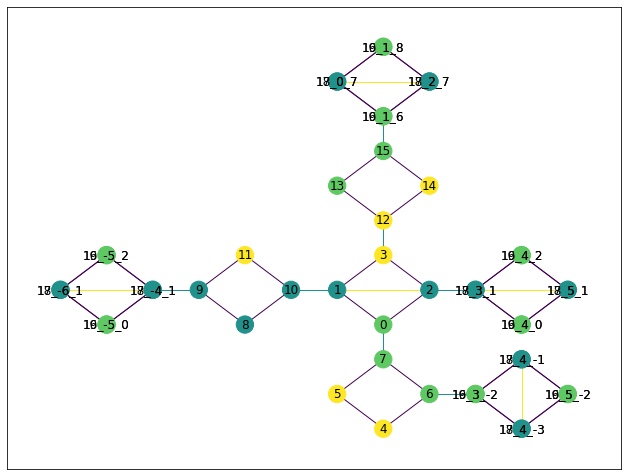

In [3]:
fig = plt.gcf()
fig.set_size_inches(11,8.5)
draw_board(cboard)

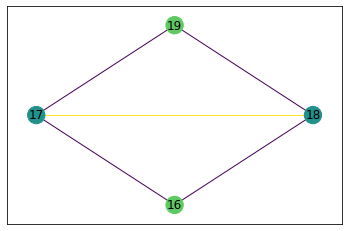

In [4]:
draw_board(_t)

In [5]:
[n for n in cboard.nodes]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 '16_3_-2',
 '17_4_-1',
 '19_5_-2',
 '18_4_-3',
 '16_1_6',
 '17_0_7',
 '19_1_8',
 '18_2_7',
 '16_4_0',
 '17_3_1',
 '19_4_2',
 '18_5_1',
 '16_-5_2',
 '17_-4_1',
 '19_-5_0',
 '18_-6_1',
 '16_5_-2',
 '17_4_-3',
 '19_3_-2',
 '18_4_-1',
 '16_1_8',
 '17_2_7',
 '19_1_6',
 '18_0_7',
 '16_4_2',
 '17_5_1',
 '19_4_0',
 '18_3_1',
 '16_-5_0',
 '17_-6_1',
 '19_-5_2',
 '18_-4_1']

In [6]:
[cboard.nodes[n] for n in cboard.nodes]

[{'shield': False,
  'turn': 0,
  'tile': 8,
  'tileRotation': 0,
  'x': 1,
  'y': 0,
  'geography': 3,
  'meeple': False,
  'player': -1,
  'placed': True},
 {'shield': False,
  'turn': 0,
  'tile': 8,
  'tileRotation': 0,
  'x': 0,
  'y': 1,
  'geography': 2,
  'meeple': False,
  'player': -1,
  'placed': True},
 {'shield': False,
  'turn': 0,
  'tile': 8,
  'tileRotation': 0,
  'x': 2,
  'y': 1,
  'geography': 2,
  'meeple': False,
  'player': -1,
  'placed': True},
 {'shield': False,
  'turn': 0,
  'tile': 8,
  'tileRotation': 0,
  'x': 1,
  'y': 2,
  'geography': 4,
  'meeple': False,
  'player': -1,
  'placed': True},
 {'shield': True,
  'turn': 1,
  'tile': 18,
  'tileRotation': 2,
  'x': 1,
  'y': -3,
  'geography': 4,
  'meeple': False,
  'player': 0,
  'placed': True},
 {'shield': False,
  'turn': 1,
  'tile': 18,
  'tileRotation': 2,
  'x': 0,
  'y': -2,
  'geography': 4,
  'meeple': False,
  'player': 0,
  'placed': True},
 {'shield': False,
  'turn': 1,
  'tile': 18,
  'ti

In [7]:
[cboard.edges[n] for n in cboard.edges]

[{<Link.Internal: 0>: True, <Link.Tile: 1>: False, <Link.Feature: 2>: False},
 {<Link.Internal: 0>: True, <Link.Tile: 1>: False, <Link.Feature: 2>: False},
 {<Link.Internal: 0>: False, <Link.Tile: 1>: True, <Link.Feature: 2>: False},
 {<Link.Internal: 0>: False, <Link.Tile: 1>: False, <Link.Feature: 2>: True},
 {<Link.Internal: 0>: True, <Link.Tile: 1>: False, <Link.Feature: 2>: False},
 {<Link.Internal: 0>: False, <Link.Tile: 1>: True, <Link.Feature: 2>: True},
 {<Link.Internal: 0>: True, <Link.Tile: 1>: False, <Link.Feature: 2>: False},
 {<Link.Internal: 0>: False, <Link.Tile: 1>: True, <Link.Feature: 2>: True},
 {<Link.Internal: 0>: False, <Link.Tile: 1>: True, <Link.Feature: 2>: True},
 {<Link.Internal: 0>: False, <Link.Tile: 1>: True, <Link.Feature: 2>: True},
 {<Link.Internal: 0>: True, <Link.Tile: 1>: False, <Link.Feature: 2>: True},
 {<Link.Internal: 0>: True, <Link.Tile: 1>: False, <Link.Feature: 2>: False},
 {<Link.Internal: 0>: True, <Link.Tile: 1>: False, <Link.Feature: 2>:

### Data generation

#### Graph

In [8]:
data = from_networkx(cboard, group_node_attrs=['geography','x','y','placed','meeple','player','shield','turn'])

In [9]:
data

Data(edge_index=[2, 136], tile=[48], tileRotation=[48], Link.Internal=[136], Link.Tile=[136], Link.Feature=[136], x=[48, 8])

In [10]:
data.x[:,:3], torch.tensor([[_t.nodes[n]['geography'],_t.nodes[n]['x'],_t.nodes[n]['y']] for n in _t.nodes])


(tensor([[ 3,  1,  0],
         [ 2,  0,  1],
         [ 2,  2,  1],
         [ 4,  1,  2],
         [ 4,  1, -3],
         [ 4,  0, -2],
         [ 3,  2, -2],
         [ 3,  1, -1],
         [ 2, -2,  0],
         [ 2, -3,  1],
         [ 2, -1,  1],
         [ 4, -2,  2],
         [ 4,  1,  3],
         [ 3,  0,  4],
         [ 4,  2,  4],
         [ 3,  1,  5],
         [ 3,  3, -2],
         [ 2,  4, -1],
         [ 3,  5, -2],
         [ 2,  4, -3],
         [ 3,  1,  6],
         [ 2,  0,  7],
         [ 3,  1,  8],
         [ 2,  2,  7],
         [ 3,  4,  0],
         [ 2,  3,  1],
         [ 3,  4,  2],
         [ 2,  5,  1],
         [ 3, -5,  2],
         [ 2, -4,  1],
         [ 3, -5,  0],
         [ 2, -6,  1],
         [ 3,  5, -2],
         [ 2,  4, -3],
         [ 3,  3, -2],
         [ 2,  4, -1],
         [ 3,  1,  8],
         [ 2,  2,  7],
         [ 3,  1,  6],
         [ 2,  0,  7],
         [ 3,  4,  2],
         [ 2,  5,  1],
         [ 3,  4,  0],
         [ 

In [11]:
data.x[:,:3].eq(torch.tensor([[_t.nodes[n]['geography'],_t.nodes[n]['x'],_t.nodes[n]['y']] for n in _t.nodes])[0,:]).all(axis=1)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False])

#### Edge Attributes

In [12]:
data.edge_attributes = torch.cat([torch.unsqueeze(d, 1) for d in [data['Link.Internal'], data['Link.Tile'], data['Link.Feature']]], axis=1)

#### Truth values

In [13]:
truth_table = []
for i in range(len(_t.nodes)):
    truth_table.append(
        torch.unsqueeze(data.x[:,:3].eq(torch.tensor([[_t.nodes[n]['geography'],_t.nodes[n]['x'],_t.nodes[n]['y']] for n in _t.nodes])[i,:]).all(axis=1), 1)
    )

data.y = torch.cat(truth_table, 1).any(axis=1)

#### Position

In [14]:
data.pos = data.x[:,1:3]


In [15]:
data

Data(edge_index=[2, 136], tile=[48], tileRotation=[48], Link.Internal=[136], Link.Tile=[136], Link.Feature=[136], x=[48, 8], edge_attributes=[136, 3], y=[48], pos=[48, 2])

## Board class tests

In [16]:
f = Path('/Users/am0472/Documents/carcassone/cARcassonne/Learning/4.graphml')

board = Board.from_graphml(f)

data = board.data

data

Data(edge_index=[2, 136], tile=[48], tileRotation=[48], Link.Internal=[136], Link.Tile=[136], Link.Feature=[136], x=[48, 8], edge_attributes=[136, 3], y=[48], pos=[48, 2])

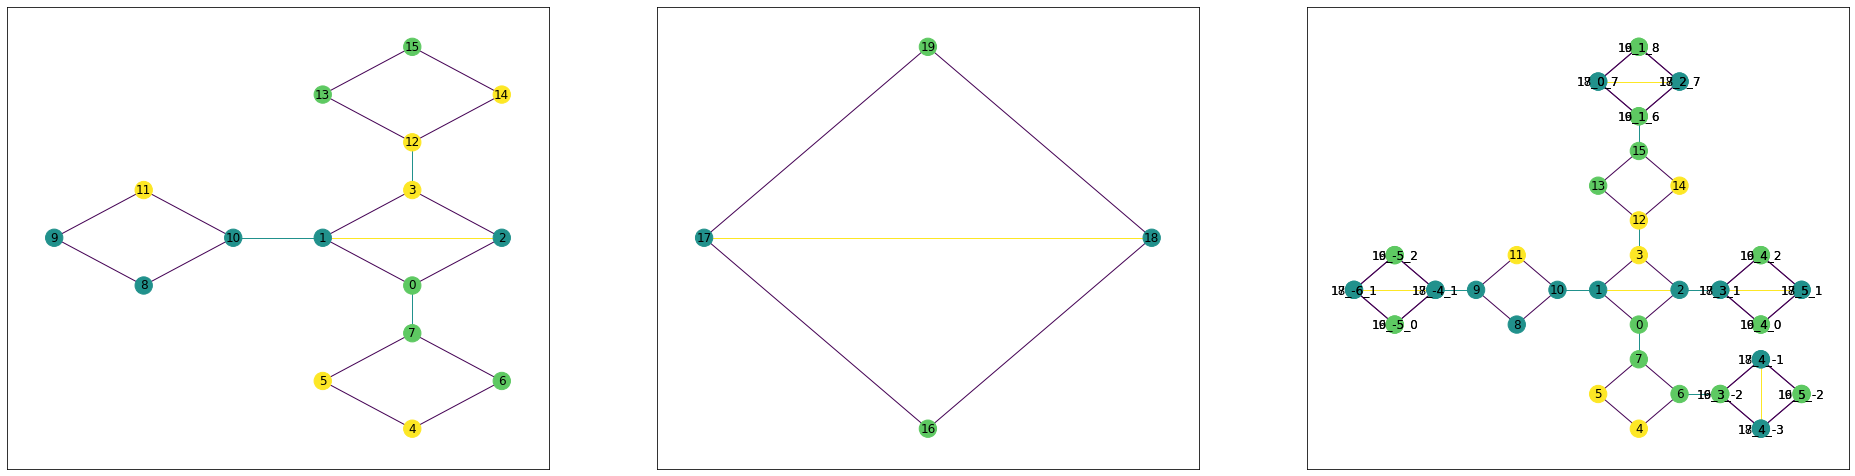

In [17]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(11*3,8.5)

plt.sca(ax[0])
draw_board(board)
plt.sca(ax[1])
draw_board(board.tile)
plt.sca(ax[2])
draw_board(board.candidates)

In [18]:
board = board.previous
data = board.data
data

Data(edge_index=[2, 110], tile=[44], tileRotation=[44], Link.Internal=[110], Link.Tile=[110], Link.Feature=[110], x=[44, 8], edge_attributes=[110, 3], y=[44], pos=[44, 2])

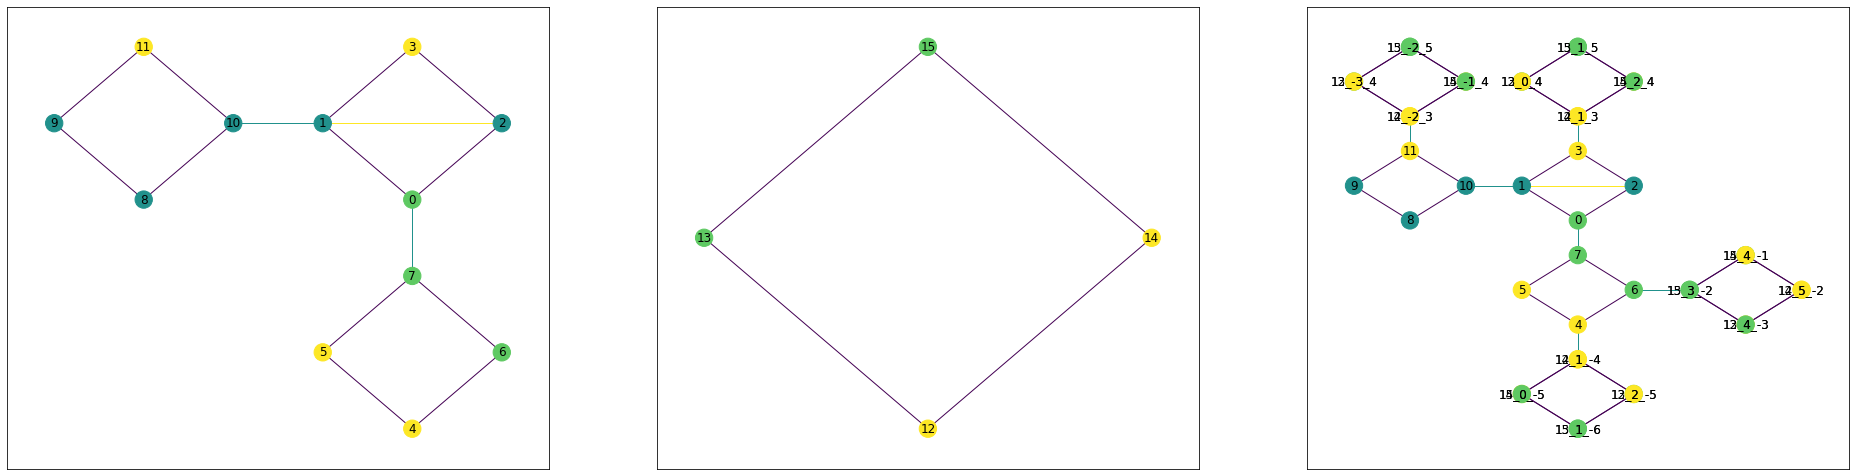

In [19]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(11*3,8.5)

plt.sca(ax[0])
draw_board(board)
plt.sca(ax[1])
draw_board(board.tile)
plt.sca(ax[2])
draw_board(board.candidates)

## Recursive processing

In [20]:
f = Path('/Users/am0472/Documents/carcassone/cARcassonne/Learning/4.graphml')
data_list = []
board = Board.from_graphml(f)

while board.number_of_nodes() > 4:
    data_list.append(board.data)
    board = board.previous

data_list

[Data(edge_index=[2, 136], tile=[48], tileRotation=[48], Link.Internal=[136], Link.Tile=[136], Link.Feature=[136], x=[48, 8], edge_attributes=[136, 3], y=[48], pos=[48, 2]),
 Data(edge_index=[2, 110], tile=[44], tileRotation=[44], Link.Internal=[110], Link.Tile=[110], Link.Feature=[110], x=[44, 8], edge_attributes=[110, 3], y=[44], pos=[44, 2]),
 Data(edge_index=[2, 110], tile=[44], tileRotation=[44], Link.Internal=[110], Link.Tile=[110], Link.Feature=[110], x=[44, 8], edge_attributes=[110, 3], y=[44], pos=[44, 2])]

# Testing/Playground

In [27]:
x = data['x'].to(float)
x

tensor([[ 3.,  1.,  0.,  1.,  0., -1.,  0.,  0.],
        [ 2.,  0.,  1.,  1.,  0., -1.,  0.,  0.],
        [ 2.,  2.,  1.,  1.,  0., -1.,  0.,  0.],
        [ 4.,  1.,  2.,  1.,  0., -1.,  0.,  0.],
        [ 4.,  1., -3.,  1.,  0.,  0.,  1.,  1.],
        [ 4.,  0., -2.,  1.,  0.,  0.,  0.,  1.],
        [ 3.,  2., -2.,  1.,  0.,  0.,  0.,  1.],
        [ 3.,  1., -1.,  1.,  0.,  0.,  0.,  1.],
        [ 2., -2.,  0.,  1.,  0.,  1.,  0.,  2.],
        [ 2., -3.,  1.,  1.,  0.,  1.,  0.,  2.],
        [ 2., -1.,  1.,  1.,  0.,  1.,  0.,  2.],
        [ 4., -2.,  2.,  1.,  0.,  1.,  0.,  2.],
        [ 4.,  1.,  3.,  0.,  0.,  0.,  0.,  3.],
        [ 3.,  0.,  4.,  0.,  0.,  0.,  0.,  3.],
        [ 3.,  1.,  5.,  0.,  0.,  0.,  0.,  3.],
        [ 4.,  2.,  4.,  0.,  0.,  0.,  0.,  3.],
        [ 4.,  1., -4.,  0.,  0.,  0.,  0.,  3.],
        [ 3.,  2., -5.,  0.,  0.,  0.,  0.,  3.],
        [ 3.,  1., -6.,  0.,  0.,  0.,  0.,  3.],
        [ 4.,  0., -5.,  0.,  0.,  0.,  0.,  3.],


In [26]:
x / torch.tensor([4.0, x[:,1].abs().max(), x[:,2].abs().max(), 1.0, 1.0, 1.0, 1.0, 71.0])

tensor([[ 0.7500,  0.2000,  0.0000,  1.0000,  0.0000, -1.0000,  0.0000,  0.0000],
        [ 0.5000,  0.0000,  0.2000,  1.0000,  0.0000, -1.0000,  0.0000,  0.0000],
        [ 0.5000,  0.4000,  0.2000,  1.0000,  0.0000, -1.0000,  0.0000,  0.0000],
        [ 1.0000,  0.2000,  0.4000,  1.0000,  0.0000, -1.0000,  0.0000,  0.0000],
        [ 1.0000,  0.2000, -0.6000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0141],
        [ 1.0000,  0.0000, -0.4000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0141],
        [ 0.7500,  0.4000, -0.4000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0141],
        [ 0.7500,  0.2000, -0.2000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0141],
        [ 0.5000, -0.4000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0282],
        [ 0.5000, -0.6000,  0.2000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0282],
        [ 0.5000, -0.2000,  0.2000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0282],
        [ 1.0000, -0.4000,  0.4000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0282],
        [ 1.0000

In [30]:
x[:,2].max(), x[:,2].min()

(tensor(5., dtype=torch.float64), tensor(-6., dtype=torch.float64))

In [33]:
x.abs().max()

tensor(6., dtype=torch.float64)

In [34]:
data.tile

tensor([ 8,  8,  8,  8, 18, 18, 18, 18, 11, 11, 11, 11, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13])